<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/RL_Predi%C3%A7%C3%A3o_da_Idade_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear - Predição da Idade

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Titanic
 Estimar as idades dos passageiros que estão faltando 

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
train = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/titanic/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/udemy data science/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/titanic/test.csv')

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Transformar definir o id do passageiro com index 

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.set_index('PassengerId', inplace=True)

In [8]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [9]:
test.shape

(418, 10)

In [10]:
train.shape

(891, 11)

### Criar coluna 'Survived' no test set

In [11]:
test['Survived'] = np.nan

In [12]:
test.shape

(418, 11)

### Concatenar train e test set

In [13]:
data = pd.concat([train, test], sort=False)

In [14]:
data.shape

(1309, 11)

In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### traduzir coluna

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaoConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

In [18]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Traduzir sexo

In [19]:
data['Sexo'].replace({'male':'homem','female':'mulher'}, inplace=True)

In [20]:
data.loc[data['Sexo']=='homem'].shape

(843, 11)

In [21]:
data.loc[data['Sexo']=='mulher'].shape

(466, 11)

In [22]:
data['Sexo'].head(5)

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
5     homem
Name: Sexo, dtype: object

### Averiguar dados nulos

In [23]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaoConjuge       0
PaisFilhos         0
Bilhete            0
Tarifa             1
Cabine          1014
Embarque           2
dtype: int64

### Remover a cabine 
por possuir muitos dados faltando

In [24]:
data.drop('Cabine', axis=1, inplace=True)

In [25]:
#checando dados nulos novamente 
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            1
Embarque          2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda 

In [26]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
data['Embarque'].mode()

0    S
Name: Embarque, dtype: object

In [28]:
data['Embarque'].mode()[0]

'S'

In [29]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [30]:
#preencher dados nulos
data['Embarque'].fillna(moda, inplace=True)

In [31]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            1
Embarque          0
dtype: int64

### Preencher dados nulos de "Tarifa" com a media

In [32]:
mediaTarifa = data['Tarifa'].mean()
mediaTarifa

33.29547928134557

In [33]:
data['Tarifa'].fillna(mediaTarifa, inplace=True)

### Checar dados nulos

In [34]:
data.isnull().sum()

Sobreviveu      418
Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Embarque          0
dtype: int64

### Verificar Correlações

In [35]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaoConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaoConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com 'heatmap'

<Axes: >

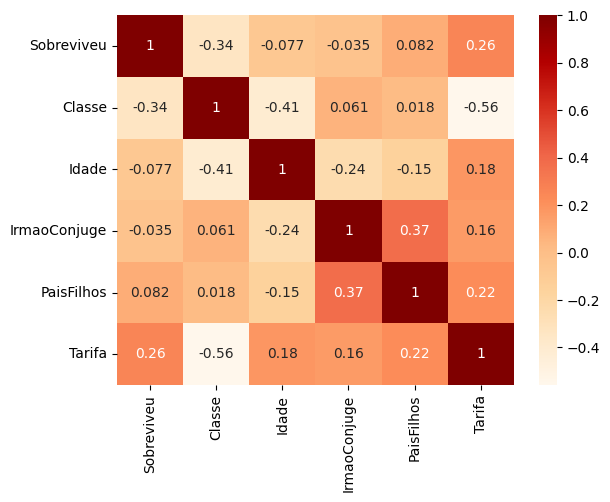

In [36]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover colua 'Sobreviveu'
muitos dados nulos e pouca correlação com a idade 

In [37]:
data.drop('Sobreviveu', axis=1, inplace=True)

In [38]:
data.isnull().sum()

Classe            0
Nome              0
Sexo              0
Idade           263
IrmaoConjuge      0
PaisFilhos        0
Bilhete           0
Tarifa            0
Embarque          0
dtype: int64

## Engenharia de Recurso I

criar coluna "Titulo" Baseando-se na coluna "Nome"

In [39]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')
data['Titulo']

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Titulo, Length: 1309, dtype: object

In [40]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [41]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


Mr, Mrs, miss, Master

In [42]:
['Miss','Master','Mr','Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [43]:
data['Titulo'] = data['Titulo'].apply( lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs']else x)

In [44]:
data.loc[data['Titulo']=='Master'].mean()

<ipython-input-44-6e541eae4ad0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data['Titulo']=='Master'].mean()


Classe           2.655738
Idade            5.482642
IrmaoConjuge     2.049180
PaisFilhos       1.377049
Tarifa          36.008195
dtype: float64

In [45]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [46]:
titulos_traduzidos= {'Master':'Menino', 
                     'Miss':'Solteira', 
                     'Mr':'HomemAdulto',
                     'Mrs':'Casada',
    
}

In [47]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

In [48]:
data.head()

,Classe,Nome,Sexo,Idade,IrmaoConjuge,PaisFilhos,Bilhete,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S,HomemAdulto
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C,Casada
3,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,S,Solteira
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,S,Casada
5,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,S,HomemAdulto


In [49]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Casada,0,197
HomemAdulto,757,0
Menino,61,0
Solteira,0,260


### Averiguar informações do DataFrame

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Classe        1309 non-null   int64  
 1   Nome          1309 non-null   object 
 2   Sexo          1309 non-null   object 
 3   Idade         1046 non-null   float64
 4   IrmaoConjuge  1309 non-null   int64  
 5   PaisFilhos    1309 non-null   int64  
 6   Bilhete       1309 non-null   object 
 7   Tarifa        1309 non-null   float64
 8   Embarque      1309 non-null   object 
 9   Titulo        1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


Remover 'Bilhete' e 'Nome'

In [51]:
data.drop(['Bilhete','Nome'], axis=1, inplace=True)

In [52]:
data.head()

,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


## Engenharia de Recurso II

**Estudar possibilidade de indentificar "meninas" similar aos "meninos"**

atraves da combinação: "solteira" e está com "pais"

In [53]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais


,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


In [54]:
solteiras_com_pais['Idade'].mean()

12.178815789473685

### Verificar distribuição da idade

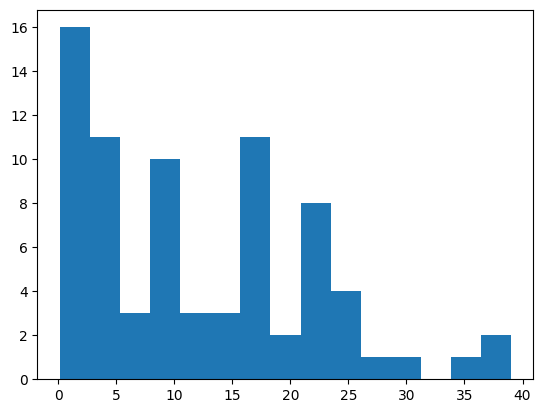

In [55]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()
#bastante criança acompanhada dos pais

### Media de mulheres "Solteiras"

In [56]:
mulher_solteira = data.loc[data['Titulo']=='Solteira']
mulher_solteira['Idade'].mean()

21.774238095238097

### Distribuição das mulheres "Solteiras

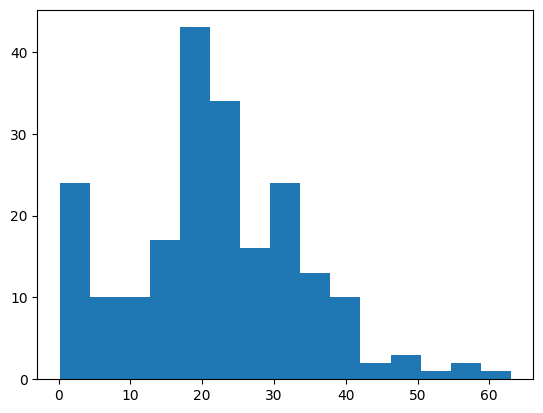

In [57]:
plt.hist(mulher_solteira['Idade'], bins=15)
plt.show()

### Média de idade de mulheres 'Casadas'

In [58]:
mulher_casada = data.loc[data['Titulo']=='Casada']
mulher_casada['Idade'].mean()

36.99411764705882

### Distribuição das mulheres "Casadas"

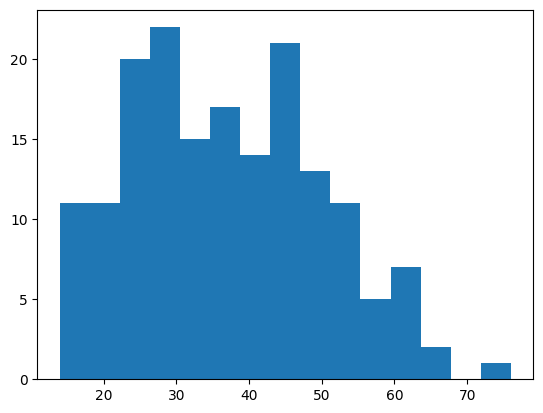

In [59]:
plt.hist(mulher_casada['Idade'], bins=15)
plt.show()

## Adicionar coluna "Solteiras com pais
# New Section

In [62]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [64]:
data['solteiras_com_pais'] = 0
data['solteiras_com_pais']

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: solteiras_com_pais, Length: 1309, dtype: int64

In [67]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
      data['solteiras_com_pais'].at[idx]=1
   
    

In [73]:
data.loc[data['solteiras_com_pais']==1]['Idade'].mean()

12.178815789473685

In [74]:
data.loc[data['solteiras_com_pais']==0]['Idade'].mean()

31.26812371134021

In [76]:
data.head()

,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


### Transformar recursos categoricos em dummies

In [78]:
data['Sexo'] = data['Sexo'].map({'homem': 0 ,'mulher':1})

In [79]:
data['Sexo']

PassengerId
1       0
2       1
3       1
4       1
5       0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Sexo, Length: 1309, dtype: int64

In [81]:
data.head()


,Classe,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [85]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [86]:
data.shape

(1309, 13)

In [87]:
data.head()

,Sexo,Idade,IrmaoConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0


### Separar train e test para idades


*   Treinar com dados não nulos
*   aplicar modelo em dados nulos



In [89]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaoConjuge            0
PaisFilhos              0
Tarifa                  0
solteiras_com_pais      0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [90]:
train_idade = data.dropna()

In [92]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [93]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

###Definir X e y para treinar o modelo

In [94]:
X = train_idade.drop('Idade', axis=1)
y = train_idade['Idade']

In [95]:
y.shape, X.shape

((1046,), (1046, 12))

### Importar e instanciar o modelo Regressivo

In [96]:
from sklearn import linear_model

In [99]:
lm = linear_model.LinearRegression()

In [100]:
from sklearn.model_selection import train_test_split

### Dividr 70% para treinar, 30% para testar

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [103]:
lm.fit(X_train, y_train)

LinearRegression()

### Faze a Predição

In [105]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error(erro quadrado médio)

In [109]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [110]:
#O quao bem o nosso modelo funcionou em relação a média 
lm.score(X_test, y_test)

0.48058769824322345

### Averiguar RMSE

In [112]:
mse =  mean_squared_error(y_test, pred)
print('MSE: ',mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

MSE:  107.40041915124114
RMSE:  10.36341734908139


### Vizualizar résiduos em scatterplot

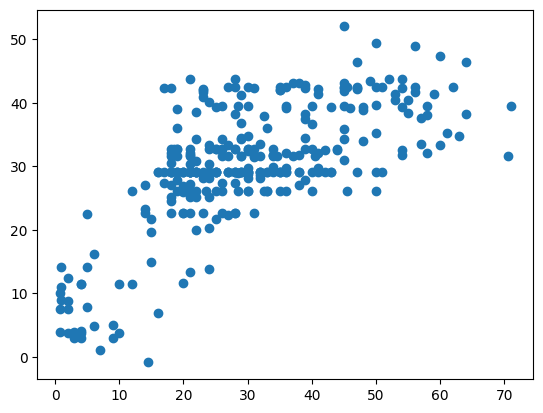

In [113]:
plt.scatter(y_test, pred)
plt.show()

### Aplicar Modelo nos dados nulos

In [115]:
test_idade.shape

(263, 12)

In [118]:
pred_idade = lm.predict(test_idade)
pred_idade.shape

(263,)

### Criar coluna idade contendos as predições

In [119]:
test_idade['Idade'] = pred_idade

In [120]:
test_idade.isnull().sum()

Sexo                  0
IrmaoConjuge          0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

In [121]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concantenar Dados

In [124]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade" 

In [127]:
idade.isnull().sum()


Sexo                  0
Idade                 0
IrmaoConjuge          0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [128]:
idade.shape

(1309, 13)

In [129]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.163780
1302,1302,25.163531
1305,1305,29.088798


Salvar CSV com idade Completa

In [131]:
idade_completa.to_csv('idade_completa.csv', index=False)